In [1]:
#libraries
import tensorflow.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.layers import Input , Dense , Activation, Flatten , Conv2D , MaxPool2D ,Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy   #for binary classification only
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau  #for stop over fitting
from tensorflow.keras import metrics
from keras.utils import to_categorical
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay ,accuracy_score ,precision_score, recall_score, roc_auc_score, roc_curve, auc ,f1_score,precision_recall_curve
from imblearn.metrics import specificity_score, sensitivity_score
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import math
import seaborn as sns
import pandas as pd
import sklearn
import sys
import glob

In [2]:
pip install tensorflow==2.12.1

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [3]:
print("Python version is", sys.version)
print("Scikit-learn version is: ", sklearn.__version__)
print("Tensorflow version is: ", tf.__version__)


Python version is 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
Scikit-learn version is:  1.2.2
Tensorflow version is:  2.12.1


In [4]:
main_direction_path = r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1'
print(main_direction_path)

/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1


In [5]:
train_folder_path = main_direction_path + '/train'
test_folder_path = main_direction_path + '/test'

In [6]:
#for train
aom_path_train_path = train_folder_path + '/AOM/'
csom_path_train_path = train_folder_path +'/CSOM/'
earwax_path_train_path = train_folder_path + '/Earwax/'
normal_path_train_path = train_folder_path +'/Normal/'
Miringoskleroz_path_train_path = train_folder_path + '/Miringoskleroz/'
otitisexterna_path_train_path = train_folder_path +'/OtitisEksterna/'


#for test
aom_path_test_path  = test_folder_path + '/AOM/'
csom_path_test_path  = test_folder_path +'/CSOM/'
earwax_path_test_path  = test_folder_path + '/Earwax/'
normal_path_test_path  = test_folder_path +'/Normal/'
Miringoskleroz_path_test_path  = test_folder_path + '/Miringoskleroz/'
otitisexterna_path_test_path  = test_folder_path +'/OtitisEksterna/'


In [7]:
totatl_train_images = (len(os.listdir(aom_path_train_path)) +
                       len(os.listdir(csom_path_train_path)) +
                       len(os.listdir(earwax_path_train_path)) +
                       len(os.listdir(normal_path_train_path)) +
                       len(os.listdir(Miringoskleroz_path_train_path)) +
                       len(os.listdir(otitisexterna_path_train_path)))

print(totatl_train_images)

871


In [8]:
totatl_test_images = (len(os.listdir(aom_path_test_path)) +
                       len(os.listdir(csom_path_test_path)) +
                       len(os.listdir(earwax_path_test_path)) +
                       len(os.listdir(normal_path_test_path)) +
                       len(os.listdir(Miringoskleroz_path_test_path)) +
                       len(os.listdir(otitisexterna_path_test_path)))

print(totatl_test_images)

217


In [9]:
classes_name = list(os.listdir(train_folder_path))
classes_name

['OtitisEksterna', 'Miringoskleroz', 'CSOM', 'Earwax', 'Normal', 'AOM']

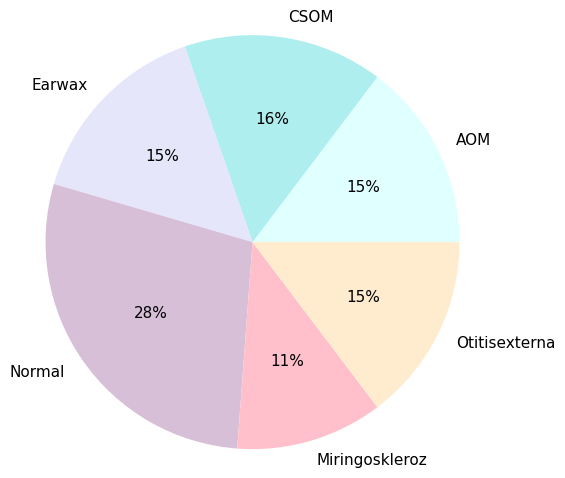

In [10]:
x = np.array([len(os.listdir(aom_path_train_path)),len(os.listdir(csom_path_train_path)),
              len(os.listdir(earwax_path_train_path)),len(os.listdir(normal_path_train_path)),
              len(os.listdir(Miringoskleroz_path_train_path)),len(os.listdir(otitisexterna_path_train_path))])
labels = ['AOM', 'CSOM', 'Earwax', 'Normal', 'Miringoskleroz', 'Otitisexterna']

plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.4, textprops={'fontsize': 11}, colors=['#E0FFFF','#AFEEEE','#E6E6FA','#D8BFD8','#FFC0CB','#FFEBCD'])
plt.savefig("pie_chart.png")
plt.show()


In [11]:

'''
img_datagen = ImageDataGenerator(rescale = 1./255,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   #preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
                                   )


training_set = img_datagen.flow_from_directory(train_folder_path,
                                                     target_size = (224, 224),
                                                     batch_size = 32,
                                                     class_mode='categorical',
                                                     )

test_set = test_datagen.flow_from_directory(test_folder_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle=False
                                      )
 '''                                     

"\nimg_datagen = ImageDataGenerator(rescale = 1./255,\n                                   )\n\ntest_datagen = ImageDataGenerator(rescale = 1./255,\n                                   #preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,\n                                   )\n\n\ntraining_set = img_datagen.flow_from_directory(train_folder_path,\n                                                     target_size = (224, 224),\n                                                     batch_size = 32,\n                                                     class_mode='categorical',\n                                                     )\n\ntest_set = test_datagen.flow_from_directory(test_folder_path,\n                                          target_size = (224, 224),\n                                          batch_size = 32,\n                                          shuffle=False\n                                      )\n "

In [12]:
#training_set.class_indices

In [13]:
SIZE = 224

In [14]:
train_images = []
train_labels = [] 

In [15]:
for directory_path in glob.glob(r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1/train/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
       # print(img_path)
        
        img = plt.imread(img_path)       
      #  img = transform.rescale(img, 1./255 ,anti_aliasing=True)
        img = transform.resize(img, (SIZE, SIZE, 3),anti_aliasing=True)

        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

OtitisEksterna
Miringoskleroz
CSOM
Earwax
Normal
AOM


In [16]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [17]:
len(train_images)

871

In [18]:
len(train_labels)

871

In [19]:
img.shape

(224, 224, 3)

In [20]:
test_images = []
test_labels = [] 

In [21]:
for directory_path in glob.glob(r'/kaggle/input/ear-5fold/data1 - 282image 7class - unsharpe - aug - CLAHE - 5Fold/fold 1/test/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
       # print(img_path)
        
        img = plt.imread(img_path)       
    #    img = transform.rescale(img, 1./255 ,anti_aliasing=True)
        img = transform.resize(img, (SIZE, SIZE, 3),anti_aliasing=True)

        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

OtitisEksterna
Miringoskleroz
CSOM
Earwax
Normal
AOM


In [22]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [23]:
len(test_images)

217

In [24]:
len(test_labels)

217

In [25]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [26]:
y_train = to_categorical(train_labels_encoded, 6)

In [27]:
y_test = to_categorical(test_labels_encoded, 6)

## Non trainable

In [ ]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'relu', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model1 = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model1.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist1 = model1.fit(train_images, y_train, epochs=10, validation_data = (test_images,y_test)
          , verbose=1,batch_size = 16)

In [ ]:
Y_pred1 = model1.predict(test_images)
y_pred_class1 = np.argmax(Y_pred1 ,  axis = 1)

In [ ]:
loss, acc = model1.evaluate(test_images,y_test)

In [ ]:
accuracy1 = accuracy_score(test_labels_encoded, y_pred_class1)
accuracy1

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm = confusion_matrix(test_labels_encoded, y_pred_class1, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class1))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class1, target_names=target_names))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_nontrainable.png")
plt.show()

In [ ]:
report = classification_report(test_labels_encoded, y_pred_class1, target_names=target_names)
print(report)

In [ ]:
df1 = pd.DataFrame(cm)
print(df1)

In [ ]:
#from tensorflow.keras.utils import to_categorical
y_true = test_labels_encoded

In [ ]:
print("specificity: "+ str(specificity_score(y_true, y_pred_class1, average=None)))
print("sensitivity: "+ str(sensitivity_score(y_true, y_pred_class1, average=None)))
print("Precision: "+ str(precision_score(y_true, y_pred_class1, average=None)))
print("Recall: "+ str(recall_score(y_true, y_pred_class1, average=None)))
print("f1_score: "+ str(f1_score(y_true, y_pred_class1, average=None)))
print("weighted Roc score: " + str(roc_auc_score(y_true,Y_pred1,multi_class='ovr',average=None)))

In [ ]:
specificity_non = specificity_score(y_true, y_pred_class1, average='weighted')
sensitivity_non = sensitivity_score(y_true, y_pred_class1, average='weighted')
Precision_non = precision_score(y_true, y_pred_class1, average='weighted')
Recall_non = recall_score(y_true, y_pred_class1, average='weighted')
f1_score_non = f1_score(y_true, y_pred_class1, average='weighted')
Roc_score_non = roc_auc_score(y_true,Y_pred1,multi_class='ovr',average='weighted')
accuracy_non = accuracy_score(y_true, y_pred_class1)

In [ ]:
print("specificity: "+ str(specificity_non))
print("sensitivity: "+ str(sensitivity_non))
print("Precision: "+ str(Precision_non))
print("Recall: "+ str(Recall_non))
print("f1_score: "+ str(f1_score_non))
print("weighted Roc score: " + str(Roc_score_non))
print("accuracy : " + str(accuracy_non))

## trainable

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch
model_file_path = "saved_models/model1_mobilenet-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint1 = ModelCheckpoint(
    filepath=model_file_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [29]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

#model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'relu', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step


In [30]:
#model.summary()

In [31]:
hist = model.fit(train_images, y_train, epochs=5, validation_data = (test_images,y_test), callbacks=[checkpoint1]
          , verbose=1,batch_size = 16)

Epoch 1/5
55/55 [==============================] - ETA: 0s - loss: 0.7052 - accuracy: 0.7463
Epoch 1: val_accuracy improved from -inf to 0.41935, saving model to saved_models/model1_mobilenet-01-0.4194.h5
55/55 [==============================] - 79s 1s/step - loss: 0.7052 - accuracy: 0.7463 - val_loss: 2.2742 - val_accuracy: 0.4194
Epoch 2/5
55/55 [==============================] - ETA: 0s - loss: 0.1950 - accuracy: 0.9346
Epoch 2: val_accuracy improved from 0.41935 to 0.63594, saving model to saved_models/model1_mobilenet-02-0.6359.h5
55/55 [==============================] - 71s 1s/step - loss: 0.1950 - accuracy: 0.9346 - val_loss: 1.2917 - val_accuracy: 0.6359
Epoch 3/5
55/55 [==============================] - ETA: 0s - loss: 0.1358 - accuracy: 0.9644
Epoch 3: val_accuracy improved from 0.63594 to 0.67742, saving model to saved_models/model1_mobilenet-03-0.6774.h5
55/55 [==============================] - 70s 1s/step - loss: 0.1358 - accuracy: 0.9644 - val_loss: 1.9827 - val_accuracy:

In [32]:
model2 = model.save('saved_models/model1_mobilenet.h5')

In [33]:
Y_pred = model.predict(test_images)
y_pred_class = np.argmax(Y_pred ,  axis = 1)

7/7 [==============================] - 4s 479ms/step


In [34]:
loss, acc = model.evaluate(test_images,y_test)

7/7 [==============================] - 3s 461ms/step - loss: 0.4050 - accuracy: 0.8710


In [35]:
accuracy2 = accuracy_score(test_labels_encoded, y_pred_class)
accuracy2

0.8709677419354839

In [37]:
from keras.models import load_model
model1_loaded = load_model(r'/kaggle/working/saved_models/model1_mobilenet-04-0.8802.h5')

In [38]:
Y_pred_loaded = model1_loaded.predict(test_images)
y_pred_class_loaded = np.argmax(Y_pred_loaded ,  axis = 1)

7/7 [==============================] - 4s 483ms/step


In [39]:
loss, acc = model1_loaded.evaluate(test_images,y_test)

7/7 [==============================] - 4s 453ms/step - loss: 0.4350 - accuracy: 0.8802


In [40]:
accuracy_loaded = accuracy_score(test_labels_encoded, y_pred_class_loaded)
accuracy_loaded

0.880184331797235

In [41]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm = confusion_matrix(test_labels_encoded, y_pred_class_loaded, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class_loaded))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class_loaded, target_names=target_names))

Confusion Matrix
[[26  0  0  0  2  4]
 [ 0 23  0  9  0  2]
 [ 2  3 26  0  2  0]
 [ 0  0  0 25  0  0]
 [ 1  0  0  0 59  1]
 [ 0  0  0  0  0 32]]
classification_Report
                precision    recall  f1-score   support

           AOM       0.90      0.81      0.85        32
          CSOM       0.88      0.68      0.77        34
        Earwax       1.00      0.79      0.88        33
Miringoskleroz       0.74      1.00      0.85        25
        Normal       0.94      0.97      0.95        61
 Otitisexterna       0.82      1.00      0.90        32

      accuracy                           0.88       217
     macro avg       0.88      0.87      0.87       217
  weighted avg       0.89      0.88      0.88       217



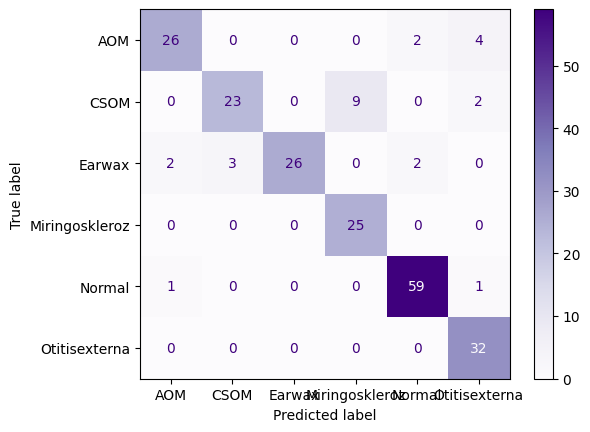

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_trainable.png")
plt.show()

In [43]:
df1 = pd.DataFrame(cm)
print(df1)

    0   1   2   3   4   5
0  26   0   0   0   2   4
1   0  23   0   9   0   2
2   2   3  26   0   2   0
3   0   0   0  25   0   0
4   1   0   0   0  59   1
5   0   0   0   0   0  32


In [44]:
class_labels = target_names
class_labels

['AOM', 'CSOM', 'Earwax', 'Miringoskleroz', 'Normal', 'Otitisexterna']

In [45]:
report = classification_report(test_labels_encoded, y_pred_class_loaded, target_names=class_labels)
print(report)

                precision    recall  f1-score   support

           AOM       0.90      0.81      0.85        32
          CSOM       0.88      0.68      0.77        34
        Earwax       1.00      0.79      0.88        33
Miringoskleroz       0.74      1.00      0.85        25
        Normal       0.94      0.97      0.95        61
 Otitisexterna       0.82      1.00      0.90        32

      accuracy                           0.88       217
     macro avg       0.88      0.87      0.87       217
  weighted avg       0.89      0.88      0.88       217



In [46]:
report_dic = classification_report(test_labels_encoded, y_pred_class_loaded, target_names=class_labels, output_dict=True)
print(report_dic)

{'AOM': {'precision': 0.896551724137931, 'recall': 0.8125, 'f1-score': 0.8524590163934426, 'support': 32}, 'CSOM': {'precision': 0.8846153846153846, 'recall': 0.6764705882352942, 'f1-score': 0.7666666666666666, 'support': 34}, 'Earwax': {'precision': 1.0, 'recall': 0.7878787878787878, 'f1-score': 0.8813559322033898, 'support': 33}, 'Miringoskleroz': {'precision': 0.7352941176470589, 'recall': 1.0, 'f1-score': 0.8474576271186441, 'support': 25}, 'Normal': {'precision': 0.9365079365079365, 'recall': 0.9672131147540983, 'f1-score': 0.9516129032258064, 'support': 61}, 'Otitisexterna': {'precision': 0.8205128205128205, 'recall': 1.0, 'f1-score': 0.9014084507042254, 'support': 32}, 'accuracy': 0.880184331797235, 'macro avg': {'precision': 0.8789136639035219, 'recall': 0.8740104151446967, 'f1-score': 0.866826766052029, 'support': 217}, 'weighted avg': {'precision': 0.8918540349028006, 'recall': 0.880184331797235, 'f1-score': 0.8779262633697889, 'support': 217}}


In [47]:
#from tensorflow.keras.utils import to_categorical
y_true = test_labels_encoded
#y_test = to_categorical(y_true)

In [48]:
specificity_classes = specificity_score(y_true, y_pred_class_loaded, average=None)
sensitivity_classes = sensitivity_score(y_true, y_pred_class_loaded, average=None)
Precision_classes = precision_score(y_true, y_pred_class_loaded, average=None)
Recall_classes = recall_score(y_true, y_pred_class_loaded, average=None)
f1_score_classes = f1_score(y_true, y_pred_class_loaded, average=None)
Roc_score_classes = roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average=None)

In [49]:
print("specificity: "+ str(specificity_classes))
print("sensitivity: "+ str(sensitivity_classes))
print("Precision: "+ str(Precision_classes))
print("Recall: "+ str(Recall_classes))
print("Roc score: " + str(Roc_score_classes))
print("f1_score: "+ str(f1_score_classes))

specificity: [0.98378378 0.98360656 1.         0.953125   0.97435897 0.96216216]
sensitivity: [0.8125     0.67647059 0.78787879 1.         0.96721311 1.        ]
Precision: [0.89655172 0.88461538 1.         0.73529412 0.93650794 0.82051282]
Recall: [0.8125     0.67647059 0.78787879 1.         0.96721311 1.        ]
f1_score: [0.85245902 0.76666667 0.88135593 0.84745763 0.9516129  0.90140845]
Roc score: [0.98496622 0.97123112 0.99785903 1.         0.99663724 1.        ]


In [50]:
dict = {'specificity': specificity_classes, 'sensitivity': sensitivity_classes, 'Precision': Precision_classes, 'Recall': Recall_classes, 'f1_score': f1_score_classes, 'Roc score': Roc_score_classes} 
df_metrics = pd.DataFrame(dict)
df_metrics = df_metrics.set_axis(class_labels)
print(df_metrics)

                specificity  sensitivity  Precision    Recall  f1_score  \
AOM                0.983784     0.812500   0.896552  0.812500  0.852459   
CSOM               0.983607     0.676471   0.884615  0.676471  0.766667   
Earwax             1.000000     0.787879   1.000000  0.787879  0.881356   
Miringoskleroz     0.953125     1.000000   0.735294  1.000000  0.847458   
Normal             0.974359     0.967213   0.936508  0.967213  0.951613   
Otitisexterna      0.962162     1.000000   0.820513  1.000000  0.901408   

                Roc score  
AOM              0.984966  
CSOM             0.971231  
Earwax           0.997859  
Miringoskleroz   1.000000  
Normal           0.996637  
Otitisexterna    1.000000  


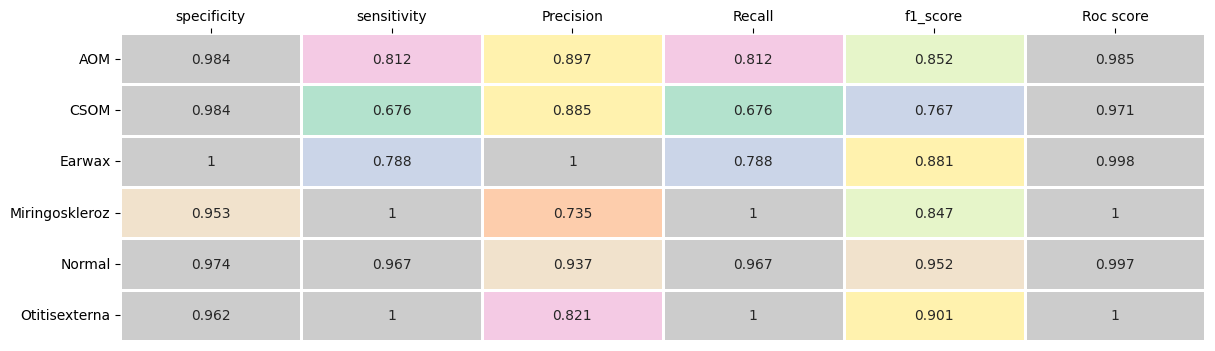

In [51]:
plt.figure(figsize=(14,4))
ax=sns.heatmap(df_metrics,cbar=False, annot=True, fmt=".3g", cmap= 'Pastel2', linewidths = 1 )
plt.savefig("metrics_mobilenet_trainable.png")
ax.xaxis.tick_top()

In [52]:
df_metrics.to_csv('metrics_mobilenet_trainable.csv', index = True)
df_metrics

,specificity,sensitivity,Precision,Recall,f1_score,Roc score
AOM,0.983784,0.812500,0.896552,0.812500,0.852459,0.984966
CSOM,0.983607,0.676471,0.884615,0.676471,0.766667,0.971231
Earwax,1.000000,0.787879,1.000000,0.787879,0.881356,0.997859
Miringoskleroz,0.953125,1.000000,0.735294,1.000000,0.847458,1.000000
Normal,0.974359,0.967213,0.936508,0.967213,0.951613,0.996637
Otitisexterna,0.962162,1.000000,0.820513,1.000000,0.901408,1.000000


In [53]:
specificity = specificity_score(y_true, y_pred_class_loaded, average='weighted')
sensitivity = sensitivity_score(y_true, y_pred_class_loaded, average='weighted')
Precision = precision_score(y_true, y_pred_class_loaded, average='weighted')
Recall = recall_score(y_true, y_pred_class_loaded, average='weighted')
Roc_score = roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='weighted')
accuracy = accuracy_score(y_true, y_pred_class_loaded)
f1_score = f1_score(y_true, y_pred_class_loaded, average='weighted')

In [54]:
print("weighted specificity: "+ str(specificity))
print("weighted sensitivity: "+ str(sensitivity))
print("weighted Precision: "+ str(Precision))
print("weighted Recall: "+ str(Recall))
print("weighted Roc score: " + str(Roc_score))
print("Accuracy: " + str(accuracy))
print("weighted f1_score: "+ str(f1_score))

weighted specificity: 0.9768521458847345
weighted sensitivity: 0.880184331797235
weighted Precision: 0.8918540349028006
weighted Recall: 0.880184331797235
weighted f1_score: 0.8779262633697889
weighted Roc score: 0.9920045919971197
Accuracy: 0.880184331797235


In [55]:
print("Macro specificity: "+ str(specificity_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro sensitivity: "+ str(sensitivity_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Precision: "+ str(precision_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Recall: "+ str(recall_score(y_true, y_pred_class_loaded, average='macro')))
print("Macro Roc score: " + str(roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='macro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred_class_loaded)))
print("Macro f1_score: "+ str(f1_score(y_true, y_pred_class_loaded, average='macro')))

Macro specificity: 0.9761727462803282
Macro sensitivity: 0.8740104151446967
Macro Precision: 0.8789136639035219
Macro Recall: 0.8740104151446967


TypeError: 'numpy.float64' object is not callable

In [ ]:
print("Micro specificity: "+ str(specificity_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro sensitivity: "+ str(sensitivity_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Precision: "+ str(precision_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Recall: "+ str(recall_score(y_true, y_pred_class_loaded, average='micro')))
print("Micro Roc score: " + str(roc_auc_score(y_true,Y_pred_loaded,multi_class='ovr',average='micro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred_class_loaded)))
print("Micro f1_score: "+ str(f1_score(y_true, y_pred_class_loaded, average='micro')))

In [56]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    r = roc_auc_score(y_test[:, i], Y_pred_loaded[:, i])
    print("The ROC AUC score of "+target_names[i]+" is: "+str(r))

The ROC AUC score of AOM is: 0.9849662162162163
The ROC AUC score of CSOM is: 0.9712311153969785
The ROC AUC score of Earwax is: 0.9978590250329381
The ROC AUC score of Miringoskleroz is: 1.0
The ROC AUC score of Normal is: 0.9966372425388819
The ROC AUC score of Otitisexterna is: 1.0


In [57]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_pred_loaded[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

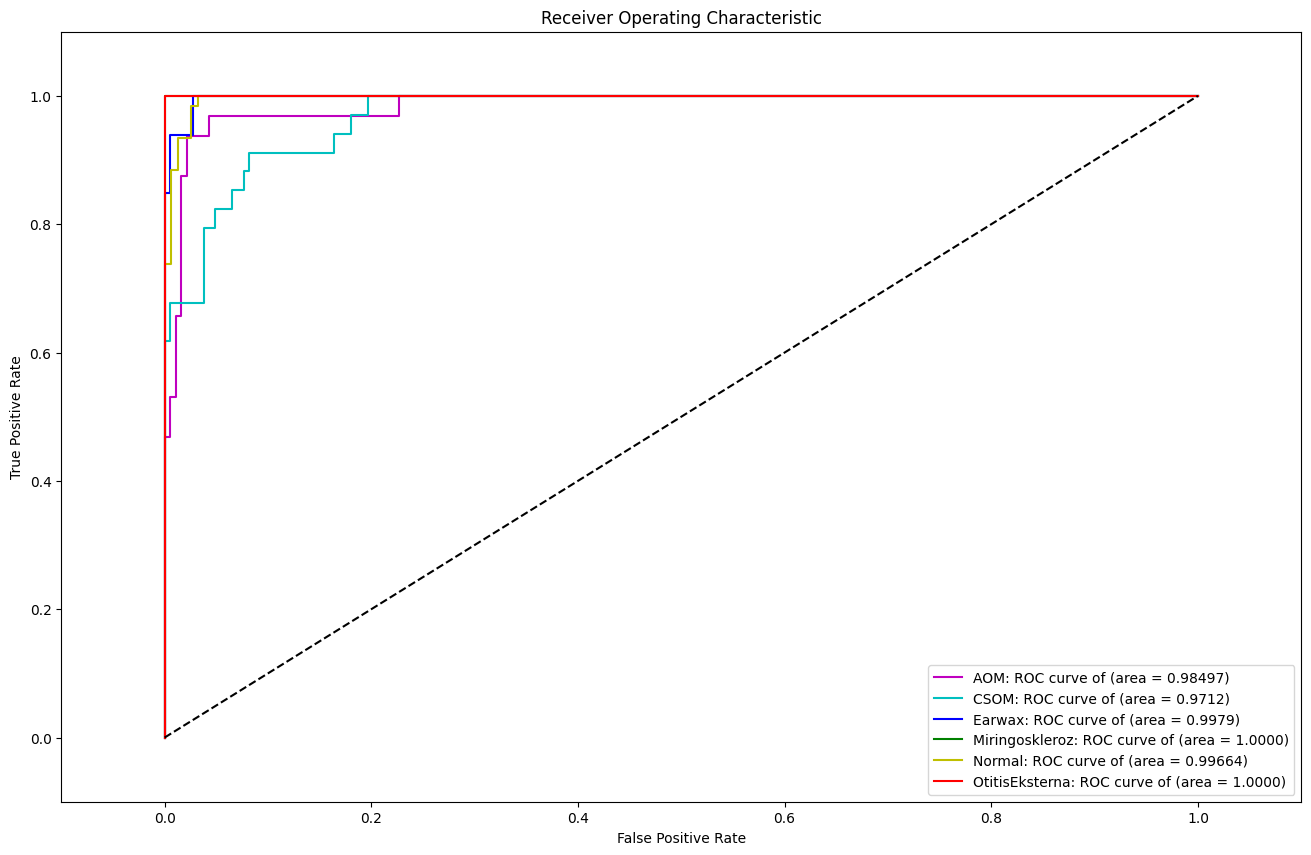

In [58]:
plt.figure(figsize=(16,10))

plt.plot(fpr[0], tpr[0],'m',label='AOM: ROC curve of (area = %0.5f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='CSOM: ROC curve of (area = %0.4f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='Earwax: ROC curve of (area = %0.4f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'g',label='Miringoskleroz: ROC curve of (area = %0.4f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'y',label='Normal: ROC curve of (area = %0.5f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'r',label='OtitisEksterna: ROC curve of (area = %0.4f)' % roc_auc[5])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_mobilenet_classes.png")
plt.show()

In [59]:
# Compute ROC curve and ROC area for each class
precision = {}
recall = {}
precision_recall = {}
for i in range(6):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], Y_pred_loaded[:, i])
    precision_recall[i] = auc(recall[i], precision[i])

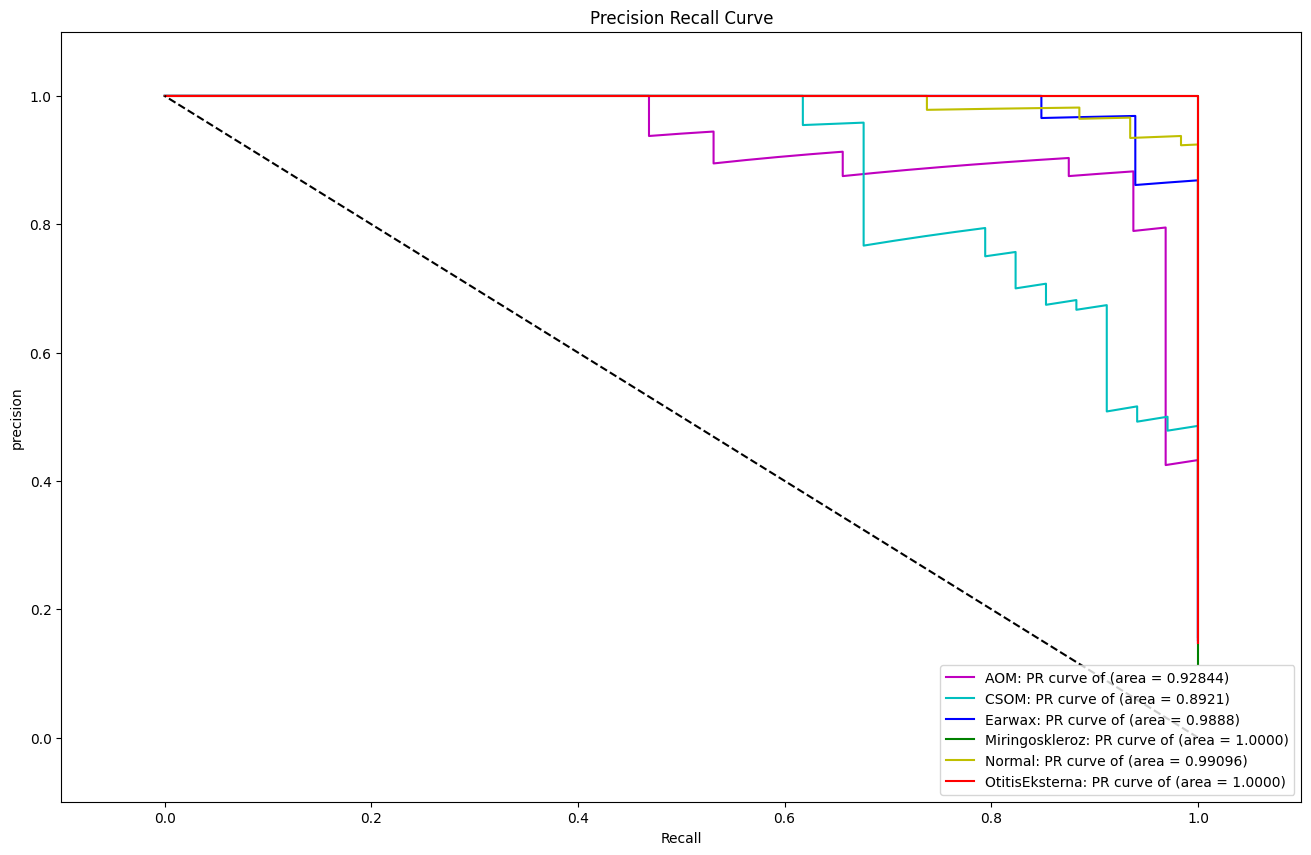

In [60]:
plt.figure(figsize=(16,10))

plt.plot(recall[0], precision[0],'m',label='AOM: PR curve of (area = %0.5f)' % precision_recall[0])
plt.plot(recall[1], precision[1],'c',label='CSOM: PR curve of (area = %0.4f)' % precision_recall[1])
plt.plot(recall[2], precision[2],'b',label='Earwax: PR curve of (area = %0.4f)' % precision_recall[2])
plt.plot(recall[3], precision[3],'g',label='Miringoskleroz: PR curve of (area = %0.4f)' % precision_recall[3])
plt.plot(recall[4], precision[4],'y',label='Normal: PR curve of (area = %0.5f)' % precision_recall[4])
plt.plot(recall[5], precision[5],'r',label='OtitisEksterna: PR curve of (area = %0.4f)' % precision_recall[5])

plt.plot([1, 0], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.savefig("PR_mobilenet_classes.png")
plt.show()

In [61]:
Classification_report = pd.DataFrame.from_dict(report_dic)

In [62]:
Classification_report

,AOM,CSOM,Earwax,Miringoskleroz,Normal,Otitisexterna,accuracy,macro avg,weighted avg
precision,0.896552,0.884615,1.000000,0.735294,0.936508,0.820513,0.880184,0.878914,0.891854
recall,0.812500,0.676471,0.787879,1.000000,0.967213,1.000000,0.880184,0.874010,0.880184
f1-score,0.852459,0.766667,0.881356,0.847458,0.951613,0.901408,0.880184,0.866827,0.877926
support,32.000000,34.000000,33.000000,25.000000,61.000000,32.000000,0.880184,217.000000,217.000000


In [63]:
Classification_report.to_csv('classification_report_mobilenet_trainable.csv', index = True)

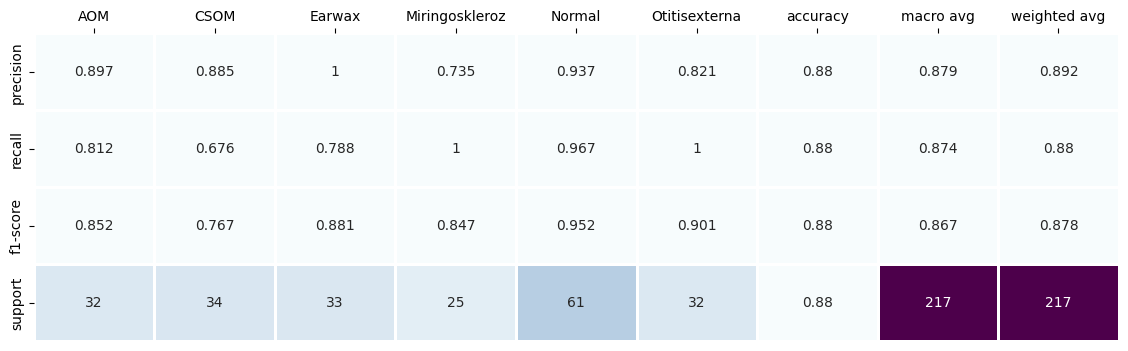

In [64]:
df = pd.read_csv('classification_report_mobilenet_trainable.csv', delimiter=',',index_col=[0])
plt.figure(figsize=(14,4))
ax = sns.heatmap(df,cbar=False, annot=True, fmt=".3g", cmap= 'BuPu', linewidths = 1 )
ax.xaxis.tick_top()
plt.savefig("cr_mobilenet_trainable.png")

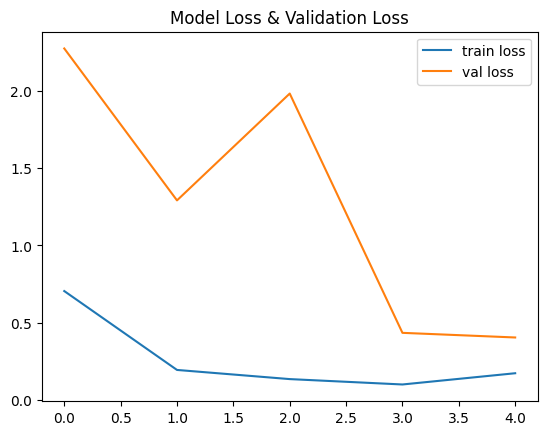

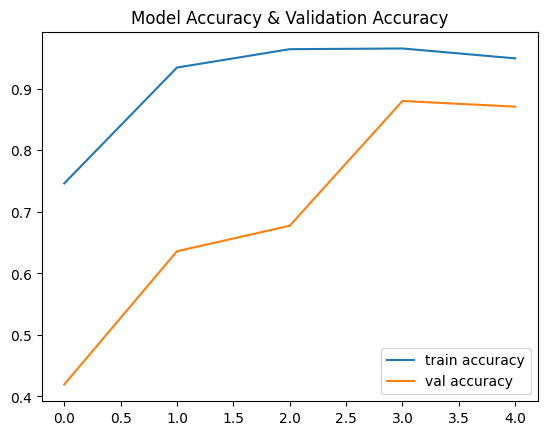

In [65]:
# plotting loss and accuracy
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'val loss')
plt.title('Model Loss & Validation Loss')
plt.legend(loc="upper right")
plt.savefig("loss_mobilenet_trainable.png")
plt.show()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val accuracy')
plt.title('Model Accuracy & Validation Accuracy')
plt.legend(loc="lower right")
plt.savefig("accuracy_mobilenet_trainable.png")
plt.show()

In [66]:
tpr={}
fpr={}
roc_auc1={}
fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())
roc_auc1["weighted"] = auc(fpr["weighted"], tpr["weighted"])
print("weighted Roc score: " + str(roc_auc1["weighted"]))

weighted Roc score: 0.9877890802522883


In [67]:
'''
tpr2={}
fpr2={}
roc_auc2={}
fpr2["weighted"], tpr2["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())
roc_auc2["weighted"] = auc(fpr2["weighted"], tpr2["weighted"])
print("weighted Roc score: " + str(roc_auc2["weighted"]))
'''

'\ntpr2={}\nfpr2={}\nroc_auc2={}\nfpr2["weighted"], tpr2["weighted"], _ = roc_curve(y_test.ravel(), Y_pred_loaded.ravel())\nroc_auc2["weighted"] = auc(fpr2["weighted"], tpr2["weighted"])\nprint("weighted Roc score: " + str(roc_auc2["weighted"]))\n'

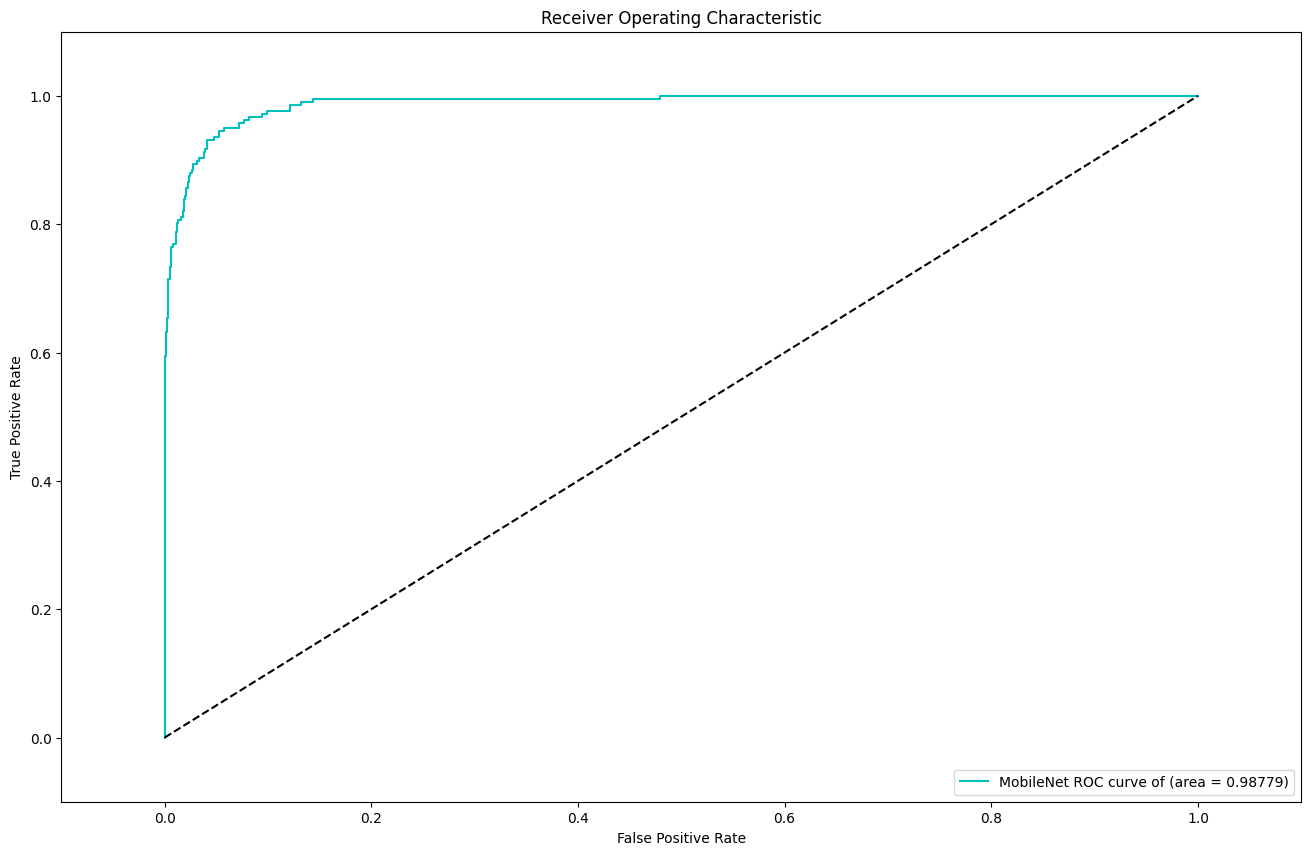

In [68]:
plt.figure(figsize=(16,10))

plt.plot(fpr['weighted'], tpr['weighted'],'c',label='MobileNet ROC curve of (area = %0.5f)' % roc_auc1['weighted'])
#plt.plot(fpr2['weighted'], tpr2['weighted'],'b',label='DenseNet169 ROC curve of (area = %0.5f)' % roc_auc2['weighted'])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_mobilenet.png")
plt.show()

In [69]:
precision1={}
recall1={}
precision_recall1={}
precision1["weighted"], recall1["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())
precision_recall1["weighted"] = auc(recall1["weighted"], precision1["weighted"])
print("PR score: " + str(precision_recall1["weighted"]))

PR score: 0.9540100079558573


In [70]:
'''
precision2={}
recall2={}
precision_recall2={}
precision2["weighted"], recall2["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())
precision_recall2["weighted"] = auc(recall2["weighted"], precision2["weighted"])
print("PR score: " + str(precision_recall2["weighted"]))
'''

'\nprecision2={}\nrecall2={}\nprecision_recall2={}\nprecision2["weighted"], recall2["weighted"], _ = precision_recall_curve(y_test.ravel(), Y_pred_loaded.ravel())\nprecision_recall2["weighted"] = auc(recall2["weighted"], precision2["weighted"])\nprint("PR score: " + str(precision_recall2["weighted"]))\n'

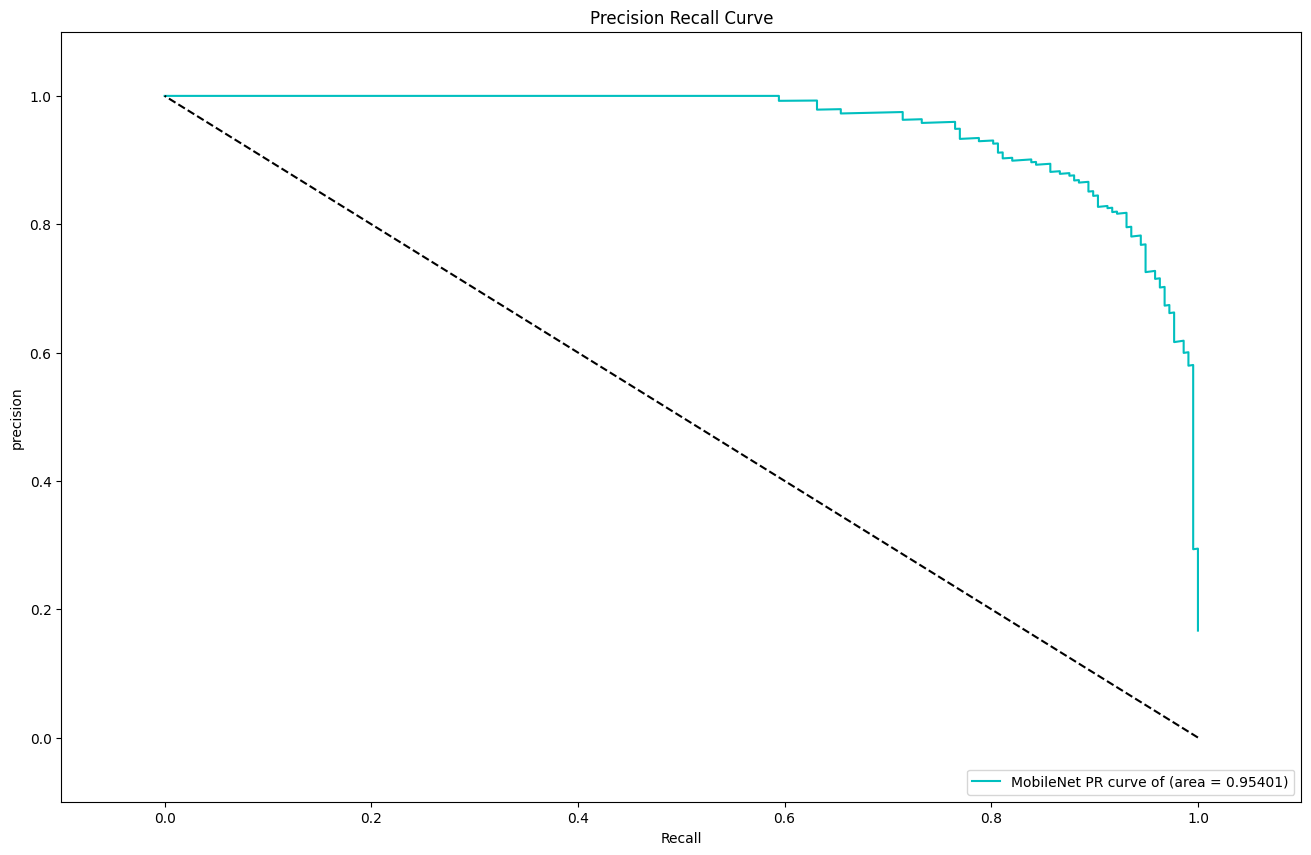

In [71]:
plt.figure(figsize=(16,10))

plt.plot(recall1['weighted'], precision1['weighted'],'c',label='MobileNet PR curve of (area = %0.5f)' % precision_recall1['weighted'])
#plt.plot(recall2['weighted'], precision2['weighted'],'b',label='DenseNet169 PR curve of (area = %0.5f)' % precision_recall2['weighted'])

plt.plot([1, 0], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('Recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.savefig("PR_mobilenet.png")
plt.show()

## 5 trails

In [72]:
accuracies = []
accuracies.append(accuracy)
specificitys = [] 
specificitys.append(specificity)
sensitivitys = [] 
sensitivitys.append(sensitivity)
Precisions = [] 
Precisions.append(Precision)
Recalls = [] 
Recalls.append(Recall)
f1_scores = []
f1_scores.append(f1_scores)
Roc_scores = [] 
Roc_scores.append(Roc_score)

In [80]:
df_total = df1

In [101]:
input_shape = (224,224,3)
model = tf.keras.applications.MobileNet(input_shape = input_shape,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

#model.trainable = False

global_average_pooling = GlobalAveragePooling2D()(model.output)
fc1 = Dense(units = 55, activation = 'relu', name = 'Dense1_tuned')(global_average_pooling)
dropout1 = Dropout(rate = 0.1, 
                      # seed = 123, 
                   name = 'dropout_tuned')(fc1)
fc2 = Dense(units = 50, activation = 'relu' , name = 'Dense2_tuned')(dropout1)
    
output_layer = Dense(6, activation = 'softmax', name = 'output_layer')(fc2)
model_trails = Model(model.input, output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = 0.0007,
            decay_steps=300,
            decay_rate=0.9)

model_trails.compile(optimizer= Adam(learning_rate=lr_schedule), loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
hist_trails = model_trails.fit(train_images, y_train, epochs=3, validation_data = (test_images,y_test), callbacks=[checkpoint1]
          , verbose=1,batch_size = 16)

Epoch 1/3
55/55 [==============================] - ETA: 0s - loss: 0.7981 - accuracy: 0.7245
Epoch 1: val_accuracy did not improve from 0.88018
55/55 [==============================] - 76s 1s/step - loss: 0.7981 - accuracy: 0.7245 - val_loss: 2.7710 - val_accuracy: 0.3410
Epoch 2/3
55/55 [==============================] - ETA: 0s - loss: 0.1679 - accuracy: 0.9472
Epoch 2: val_accuracy did not improve from 0.88018
55/55 [==============================] - 68s 1s/step - loss: 0.1679 - accuracy: 0.9472 - val_loss: 1.8492 - val_accuracy: 0.5530
Epoch 3/3
55/55 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9277
Epoch 3: val_accuracy did not improve from 0.88018
55/55 [==============================] - 68s 1s/step - loss: 0.2082 - accuracy: 0.9277 - val_loss: 1.1026 - val_accuracy: 0.7465


In [103]:
Y_pred_trails = model_trails.predict(test_images)
y_pred_class_trails = np.argmax(Y_pred_trails ,  axis = 1)

7/7 [==============================] - 4s 509ms/step


In [104]:
loss, acc = model_trails.evaluate(test_images,y_test)

7/7 [==============================] - 4s 517ms/step - loss: 1.1026 - accuracy: 0.7465


In [105]:
accuracy_trails = accuracy_score(test_labels_encoded, y_pred_class_trails)
accuracy_trails

0.7465437788018433

In [106]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Miringoskleroz','Normal','Otitisexterna']
label_names = [0,1,2,3,4,5]

cm_trails = confusion_matrix(test_labels_encoded, y_pred_class_trails, labels = label_names)

print('Confusion Matrix')
print(confusion_matrix(test_labels_encoded, y_pred_class_trails))

print('classification_Report')
print(classification_report(test_labels_encoded, y_pred_class_trails, target_names=target_names))

Confusion Matrix
[[11  0  1  0 10 10]
 [ 0  7 10  0 14  3]
 [ 0  0 30  0  0  3]
 [ 0  0  0 22  2  1]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  1 31]]
classification_Report
                precision    recall  f1-score   support

           AOM       1.00      0.34      0.51        32
          CSOM       1.00      0.21      0.34        34
        Earwax       0.73      0.91      0.81        33
Miringoskleroz       1.00      0.88      0.94        25
        Normal       0.69      1.00      0.82        61
 Otitisexterna       0.65      0.97      0.78        32

      accuracy                           0.75       217
     macro avg       0.85      0.72      0.70       217
  weighted avg       0.82      0.75      0.70       217



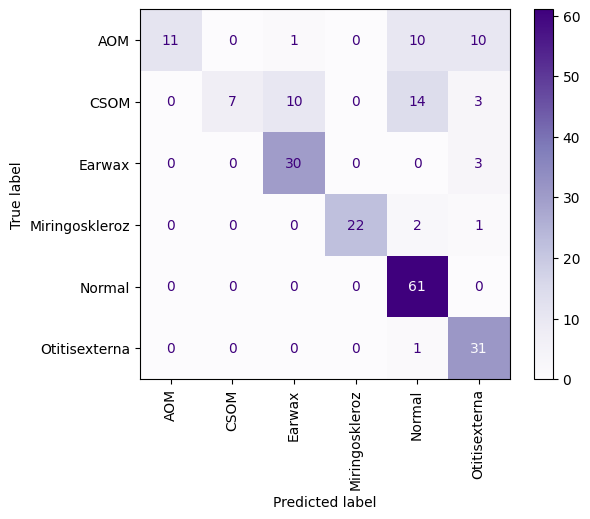

In [135]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm_trails, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_trials.png")
plt.show()

In [108]:

df2 = pd.DataFrame(cm_trails)
print(df2)
df_total = df_total + df2
print(df_total)
'''
df3 = pd.DataFrame(cm_trails)
print(df3)
df_total = df_total + df3
print(df_total)
'''
'''
df4 = pd.DataFrame(cm_trails)
print(df4)
df_total = df_total + df4
print(df_total)
'''
'''
df5 = pd.DataFrame(cm_trails)
print(df5)
df_total = df_total + df5
print(df_total)
'''

    0  1   2   3   4   5
0  11  0   1   0  10  10
1   0  7  10   0  14   3
2   0  0  30   0   0   3
3   0  0   0  22   2   1
4   0  0   0   0  61   0
5   0  0   0   0   1  31
    0   1    2   3    4    5
0  80   0    1   0   29   18
1  12  39   21   9   24   31
2   5   3  109   0    6    9
3  21   0    1  65    2   11
4  51   0    4   0  180    9
5   7   0    0   0    2  119


'\ndf5 = pd.DataFrame(cm_trails)\nprint(df5)\ndf_total = df_total + df5\nprint(df_total)\n'

In [122]:
specificity_trails = specificity_score(y_true, y_pred_class_trails, average='weighted')
sensitivity_trails = sensitivity_score(y_true, y_pred_class_trails, average='weighted')
Precision_trails = precision_score(y_true, y_pred_class_trails, average='weighted')
Recall_trails = recall_score(y_true, y_pred_class_trails, average='weighted')
Roc_score_trails = roc_auc_score(y_true,Y_pred_trails,multi_class='ovr',average='weighted')
f1_score_trails = f1_score(y_true, y_pred_class_trails, average='weighted')

TypeError: 'numpy.float64' object is not callable

In [110]:
accuracies.append(accuracy_trails)
specificitys.append(specificity_trails)
sensitivitys.append(sensitivity_trails)
Precisions.append(Precision_trails)
Recalls.append(Recall_trails)
Roc_scores.append(Roc_score_trails)
f1_scores.append(f1_score_trails)

NameError: name 'f1_score_trails' is not defined

In [123]:
print("Accuracy: " ,accuracies)
print("weighted specificity: ",specificitys)
print("weighted sensitivity: ",sensitivitys)
print("weighted Precision: ",Precisions)
print("weighted Recall: ",Recalls)
print("weighted Roc score: " ,Roc_scores)
print("weighted f1_score: ",f1_scores)

Accuracy:  [0.880184331797235, 0.6912442396313364, 0.41013824884792627, 0.41013824884792627, 0.7465437788018433]
weighted specificity:  [0.9768521458847345, 0.9144089888479789, 0.8975292012108281, 0.8975292012108281, 0.9287047975336895]
weighted sensitivity:  [0.880184331797235, 0.6912442396313364, 0.41013824884792627, 0.41013824884792627, 0.7465437788018433]
weighted Precision:  [0.8918540349028006, 0.8187518302174684, 0.37774091141833077, 0.37774091141833077, 0.8207239587058627]
weighted Recall:  [0.880184331797235, 0.6912442396313364, 0.41013824884792627, 0.41013824884792627, 0.7465437788018433]
weighted Roc score:  [0.9920045919971197]
weighted f1_score:  [[...]]


## final results

In [112]:
folds = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']

In [ ]:
#'f1_score': f1_scores, 'Roc score': Roc_scores

In [118]:
dict = {'specificity': specificitys, 'sensitivity': sensitivitys, 'Precision': Precisions, 'Recall': Recalls, 'accuracy': accuracies} 
df_metrics_fold = pd.DataFrame(dict)
df_metrics_fold

,specificity,sensitivity,Precision,Recall,accuracy
0,0.976852,0.880184,0.891854,0.880184,0.880184
1,0.914409,0.691244,0.818752,0.691244,0.691244
2,0.897529,0.410138,0.377741,0.410138,0.410138
3,0.897529,0.410138,0.377741,0.410138,0.410138
4,0.928705,0.746544,0.820724,0.746544,0.746544


In [119]:
df_metrics_fold = df_metrics_fold.set_axis(folds)
print(df_metrics_fold)

       specificity  sensitivity  Precision    Recall  accuracy
fold1     0.976852     0.880184   0.891854  0.880184  0.880184
fold2     0.914409     0.691244   0.818752  0.691244  0.691244
fold3     0.897529     0.410138   0.377741  0.410138  0.410138
fold4     0.897529     0.410138   0.377741  0.410138  0.410138
fold5     0.928705     0.746544   0.820724  0.746544  0.746544


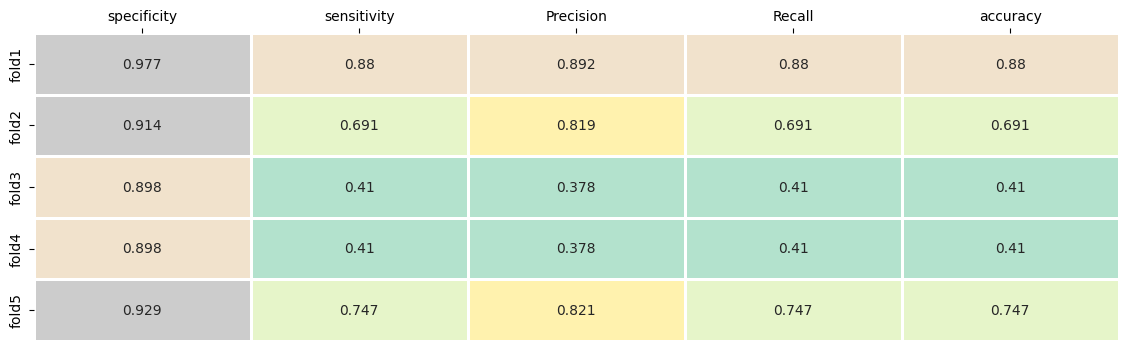

In [130]:
plt.figure(figsize=(14,4))
ax=sns.heatmap(df_metrics_fold,cbar=False, annot=True, fmt=".3g", cmap= 'Pastel2', linewidths = 1 )
plt.savefig("metrics_fold_mobilenet.png")
ax.xaxis.tick_top()

In [131]:
df_metrics_fold.to_csv('metrics_fold_mobilenet.csv', index = True)
df_metrics_fold

,specificity,sensitivity,Precision,Recall,accuracy
fold1,0.976852,0.880184,0.891854,0.880184,0.880184
fold2,0.914409,0.691244,0.818752,0.691244,0.691244
fold3,0.897529,0.410138,0.377741,0.410138,0.410138
fold4,0.897529,0.410138,0.377741,0.410138,0.410138
fold5,0.928705,0.746544,0.820724,0.746544,0.746544


In [125]:
'''
cm_all = df_total.to_numpy()
cm_all
'''

array([[ 80,   0,   1,   0,  29,  18],
       [ 12,  39,  21,   9,  24,  31],
       [  5,   3, 109,   0,   6,   9],
       [ 21,   0,   1,  65,   2,  11],
       [ 51,   0,   4,   0, 180,   9],
       [  7,   0,   0,   0,   2, 119]])

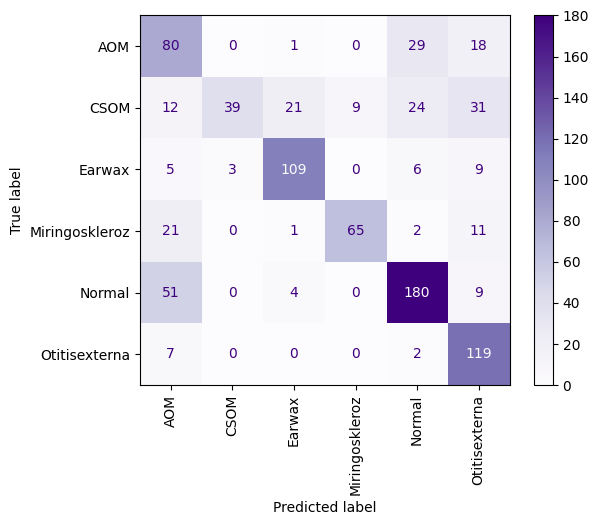

In [136]:

disp = ConfusionMatrixDisplay(confusion_matrix= cm_all, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Purples, values_format = 'g',xticks_rotation = 'vertical')
plt.savefig("cf_mobilenet_total.png")
plt.show()


In [133]:
accuracies = np.array(accuracies)

In [134]:
for score in accuracies:
    print("Score for this fold is: ", score)

# report performance
print('Mean Accuracy: ', (np.mean(accuracies)))
print('STD: ', (np.std(accuracies)))


Score for this fold is:  0.880184331797235
Score for this fold is:  0.6912442396313364
Score for this fold is:  0.41013824884792627
Score for this fold is:  0.41013824884792627
Score for this fold is:  0.7465437788018433
Mean Accuracy:  0.6276497695852534
STD:  0.1879235325692678
